In [1]:
import tweepy
import pandas as pd
!pip install afinn


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import re
def add_not(string):
    x=re.search("n't",string)
    if(x!=None):
        sub_string=string.replace("n't", " not")
        sub_words = sub_string.split()
    else:
        sub_words = string.split()
    if "not" in sub_words:
        not_index = sub_words.index("not")
        for i in range(not_index+1, len(sub_words)):
            if any(p in sub_words[i] for p in [".", ",", ";", ":", "?", "!", "-", "--", "(", ")", "[", "]", "{", "}", "'", "\""]):
                break
            else:
                sub_words[i] = "not_" + sub_words[i]
    new_string = " ".join(sub_words) 
    return new_string

In [3]:
run ./keys.ipynb

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth. set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [5]:
cursor = tweepy.Cursor(api.search_tweets,q='offensive',lang='en',tweet_mode='extended').items(1)

In [6]:
number_of_tweets=2000
tweets = []
like = []
time = []
author=[] 
retweets_list =[]
retweet_count=[]
for i in tweepy.Cursor(api.search_tweets,q='offensive',lang = 'en', tweet_mode="extended").items(number_of_tweets):
    k=i.full_text
    mentions = re.findall("@([a-zA-Z0-9_]{1,50})", k)
    print(mentions)
    tweets.append(i.full_text)
    like.append(i.favorite_count)
    time. append(i.created_at)
    author.append(i.user.screen_name)
    retweet_count.append(i.retweet_count)
new_tweets=[]
for i in tweets:
        new_tweets.append(add_not(i))

['baba_nyenyedzi']
['dunn_juliette']
['native_ameri']
['bayraktar_1love']
['DenyMilkshakes']
['bayraktar_1love']
['WhereisRussia']
['noclador']
['DenyMilkshakes']
[]
['mrsorokaa']
['picsforJK']
['McNasty']
['picsforJK']
['DenyMilkshakes']
[]
['mrsorokaa']
[]
['SpaceDanEssex']
['hrkbenowen']
['senderismo169', 'Cloudvity_Bloom', 'DeeerlyBeloved']
['balldontstop']
[]
['balldontstop']
['Theylovelus']
['OrwellsShaddow']
['kdotvici']
['DenyMilkshakes']
['SendWarriorMum', 'FugitivesMum']
['TheStudyofWar']
['bayraktar_1love']
['maria_drutska']
['maria_drutska']
[]
['picsforJK']
['smartfootball']
['TheJediSwitch']
['GordonLyon14']
['HollowLeif']
['GordonLyon14']
['DenyMilkshakes']
['bayraktar_1love']
['DenyMilkshakes']
['Caleb_302', 'KPPP_8', 'Reggie_Bflo']
['bayraktar_1love']
['mrsorokaa']
['WomenAreReals', 'SF_TERF_CENTRAL', 'XxtraEstroGenny', 'icons_women']
['ThatCivilTweet']
['Betodds1']
['DenyMilkshakes']
['native_ameri', 'JoeWelker8']
['bayraktar_1love']
['MarkHertling']
['StephenLeDrew']

TooManyRequests: 429 Too Many Requests
88 - Rate limit exceeded

In [7]:
df =pd.DataFrame({'author':author,'tweets':tweets, 'like':like, 'time':time, 'retweet-count':retweet_count,'new_tweets':new_tweets})

In [8]:
df

,author,tweets,like,time,retweet-count,new_tweets
0,Babdn2018,RT @KonstantinKisin: I know this is an awfully...,0,2023-05-20 16:43:53+00:00,1156,RT @KonstantinKisin: I know this is an awfully...
1,Matticuss77,RT @KonstantinKisin: I know this is an awfully...,0,2023-05-20 16:43:50+00:00,1156,RT @KonstantinKisin: I know this is an awfully...
2,tuggskjit,@NotCharlieKirb1 @WarMonitor3 Will you take pa...,0,2023-05-20 16:43:48+00:00,0,@NotCharlieKirb1 @WarMonitor3 Will you take pa...
3,egovictoria,@JohnSil15267902 @SenoreAmore Right time for C...,0,2023-05-20 16:43:46+00:00,0,@JohnSil15267902 @SenoreAmore Right time for C...
4,MemoryWhole13,@BillboardChris I find the behaviour of the @s...,0,2023-05-20 16:43:43+00:00,0,@BillboardChris I find the behaviour of the @s...
...,...,...,...,...,...,...
1995,wilkia001,RT @ThatCivilTweet: Arrogant and offensive. Ca...,0,2023-05-20 15:20:32+00:00,122,RT @ThatCivilTweet: Arrogant and offensive. Ca...
1996,TomReiner4,RT @MarkHertling: While the focus is on Ukrain...,0,2023-05-20 15:20:32+00:00,138,RT @MarkHertling: While the focus is on Ukrain...
1997,MCSBanned3X,Still can’t get over the fact that Andy Reid a...,9,2023-05-20 15:20:31+00:00,1,Still can’t get over the fact that Andy Reid a...
1998,lifeofajaybird,RT @KonstantinKisin: I know this is an awfully...,0,2023-05-20 15:20:30+00:00,1156,RT @KonstantinKisin: I know this is an awfully...


In [9]:
df.to_clipboard()

In [10]:
from afinn import Afinn
afn = Afinn()
          
# compute scores (polarity) and labels
scores = [afn.score(article) for article in new_tweets]
sentiment = ['positive' if score > 0
                          else 'negative' if score < 0
                              else 'neutral'
                                  for score in scores]
df = pd.DataFrame()
df['scores'] = scores
df['sentiments'] = sentiment

print(df)
df.to_csv('kmeans.csv',index=False)

      scores sentiments
0        0.0    neutral
1        0.0    neutral
2       -1.0   negative
3       -1.0   negative
4       -5.0   negative
...      ...        ...
1995    -4.0   negative
1996    -1.0   negative
1997    -5.0   negative
1998     0.0    neutral
1999     0.0    neutral

[2000 rows x 2 columns]


In [11]:
df.to_clipboard()

In [12]:
!pip3 install textblob
from textblob import TextBlob


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [13]:
subjectivity=[TextBlob(i).sentiment.subjectivity for i in new_tweets]
polarity=[TextBlob(i).sentiment.polarity for i in new_tweets]
df2 = pd.DataFrame()
df2['polarity'] = polarity
df2['subjectivity'] = subjectivity

print(df2)

      polarity  subjectivity
0    -1.000000      1.000000
1    -1.000000      1.000000
2     0.375000      0.944444
3     0.061905      0.211905
4     0.000000      0.000000
...        ...           ...
1995  0.000000      0.000000
1996  0.203788      0.476515
1997 -0.440000      0.540000
1998 -1.000000      1.000000
1999  0.375000      1.000000

[2000 rows x 2 columns]


In [14]:
df2.to_clipboard()

In [15]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [16]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn
from sklearn.cluster import KMeans
data = pd.read_csv('kmeans.csv')

In [16]:
input_data = pd.read_csv("addingAll_toCalculate_kmeans.csv")

In [17]:
input_data

,polarity,subjectivity
0,-0.100000,0.500000
1,0.362500,0.400000
2,0.190000,0.330000
3,-0.233333,0.533333
4,0.000000,0.000000
...,...,...
19995,0.000000,0.400000
19996,0.008333,0.183333
19997,0.318182,0.550000
19998,0.250000,0.366667


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


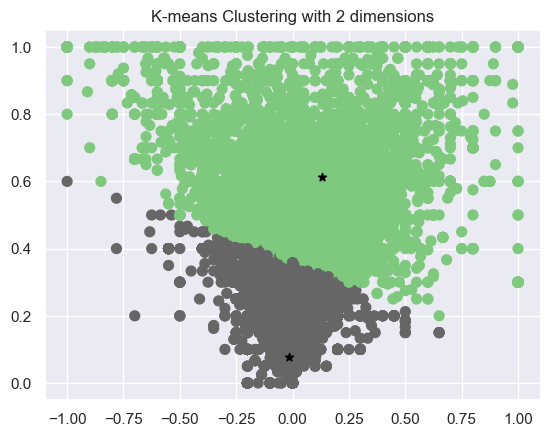

In [18]:
x =(input_data['polarity'].tolist())
y =(input_data['subjectivity'].tolist())
data = list(zip(x, y))
kmeans = KMeans(2)
kmeans.fit(data)
clusters = kmeans.cluster_centers_
plt.scatter(input_data['polarity'], input_data['subjectivity'],c=kmeans.labels_, marker='o', s=50,cmap='Accent_r')
plt.scatter(clusters[0][0],clusters[0][1], marker='*', color='black')

plt.scatter(clusters[1][0],clusters[1][1], marker='*', color='black')
plt.title('K-means Clustering with 2 dimensions')
plt.show()